<a href="https://colab.research.google.com/github/h777arsh/PyTorch-Tutorial/blob/main/Intro_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
np1 = np.random.rand(3,4)
np1

array([[0.2451591 , 0.50974875, 0.66486079, 0.88813347],
       [0.7729013 , 0.98129909, 0.32727574, 0.51145665],
       [0.04948639, 0.20670017, 0.01071251, 0.75989044]])

In [ ]:
np1.dtype

dtype('float64')

In [ ]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[-0.1706, -1.6662,  0.3728, -0.2799],
        [ 0.4604,  2.0442,  0.6886,  0.0882],
        [-0.2211,  0.2178,  0.2963, -1.0319]])

In [ ]:
tensor_2d.dtype

torch.float32

In [ ]:
tensor_zero = torch.zeros(2,3,4)
tensor_zero

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
tensor_zero.shape

torch.Size([2, 3, 4])

In [ ]:
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.2452, 0.5097, 0.6649, 0.8881],
        [0.7729, 0.9813, 0.3273, 0.5115],
        [0.0495, 0.2067, 0.0107, 0.7599]], dtype=torch.float64)

Tensor Operation

In [ ]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
# Reshape if we don't know the number of items using -1
my_torch2 = torch.arange(15)
my_torch2 = my_torch2.reshape(-1, 5)
my_torch2

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [ ]:
# view and reshape are very similar
#https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  #Input Layer(F features of the flower)
  #-> Hidden Layer1 (no. of neurons)
  #--> H2 (n)
  #--> Output(3 classes of iris flower)
  def __init__(self, in_features =  4, h1 = 8, h2 = 8, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
#pick a manual seed for randomization
torch.manual_seed(41)

model = Model()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# change last column string to number
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train test split
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [ ]:
#convert these to numpy
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the criterion of model to measure the error, how far off the predictions are from
criterion = nn.CrossEntropyLoss()
#choose Adam optimiser, lr = Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



In [ ]:
#Train our model
epochs = 100
losses = []
for i in range(epochs):
  # Go Forward
  y_pred = model.forward(X_train)

  # Measure the loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1318050622940063
Epoch: 10 and loss: 0.9658581614494324
Epoch: 20 and loss: 0.67915278673172
Epoch: 30 and loss: 0.40087202191352844
Epoch: 40 and loss: 0.22570066154003143
Epoch: 50 and loss: 0.12255845218896866
Epoch: 60 and loss: 0.07509137690067291
Epoch: 70 and loss: 0.05467577651143074
Epoch: 80 and loss: 0.04448390752077103
Epoch: 90 and loss: 0.038461681455373764


Text(0.5, 0, 'Epoch')

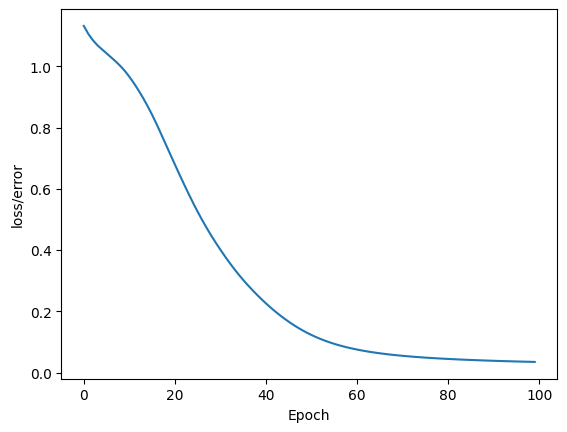

In [ ]:
# Grap
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
# Evalute Model on Test Data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propgation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
loss

tensor(0.1458)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Verginica"
    print(f'{i + 1}.) {str(y_val)} \t\t {y_test[i]} \t {y_val.argmax().item()}')
    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'We got {correct}')

1.) tensor([-7.7132,  1.5807,  4.8588]) 		 2 	 2
2.) tensor([-10.2249,   0.5155,   8.7638]) 		 2 	 2
3.) tensor([-10.7185,   1.1882,   8.2269]) 		 2 	 2
4.) tensor([-4.4690,  3.5339, -1.1210]) 		 1 	 1
5.) tensor([-9.0873,  1.4669,  6.2793]) 		 2 	 2
6.) tensor([-2.2770,  3.7022, -4.1140]) 		 1 	 1
7.) tensor([-7.0673,  2.2028,  3.2917]) 		 2 	 2
8.) tensor([-4.2226,  3.6468, -1.5420]) 		 1 	 1
9.) tensor([-8.0634,  1.8251,  4.7820]) 		 2 	 2
10.) tensor([-10.8515,   0.5058,   9.3629]) 		 2 	 2
11.) tensor([-6.8611,  2.2126,  3.0811]) 		 2 	 2
12.) tensor([  9.4301,   3.2669, -18.8494]) 		 0 	 0
13.) tensor([  8.5966,   2.9338, -17.1305]) 		 0 	 0
14.) tensor([-1.0571,  3.1664, -4.7063]) 		 1 	 1
15.) tensor([  8.0257,   3.2468, -16.7651]) 		 0 	 0
16.) tensor([-6.7032,  2.4148,  2.6586]) 		 2 	 2
17.) tensor([  8.4607,   3.0915, -17.1118]) 		 0 	 0
18.) tensor([-7.5983,  1.7014,  4.5610]) 		 1 	 2
19.) tensor([  9.0443,   3.1470, -18.0944]) 		 0 	 0
20.) tensor([  7.7209,   2.9005, -1

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([  9.2014,   3.0883, -18.2702])


In [ ]:

new_iris = torch.tensor([4.6,3.1,	1.5,	0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([  8.4599,   3.0131, -17.0138])


In [ ]:
# Save our NN model
torch.save(model.state_dict(), 'my_iris_model.pt')


In [ ]:
#load save model

new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)